# EXPLORING GENERAL PROPERTIES OF LIGAND BINDING SITES

### IMPORTING NECESSARY PACKAGES

In [1]:
from fragsys_analysis import *

### READING INPUT DATA

In [2]:
main_dir = "/Users/2394007/Documents/PHD/LOCAL/FRAGSYS_DEF/" #"/cluster/gjb_lab/2394007/pandda_analysis/phase4"
results_dir = os.path.join(main_dir, "results")

In [3]:
all_bss_dfs = pd.read_csv(os.path.join(results_dir, "all_binding_sites.csv"))
all_bs_ress = pd.read_csv(os.path.join(results_dir, "all_binding_site_residues_wgroup.csv"))

In [4]:
print(len(all_bss_dfs))

293


In [5]:
all_bss_dfs.head(3)

,bs_id,vars,occ,vars_per_occ,MES,p,norm_shenkin_rel,shenkin_ci,MES_ci,number_bs_res,number_ligs,prop_ligs,protein,group
0,BS0,95,392,0.242347,-0.363191,0.001768,26.629520,8.420723,0.230458,27,11,0.647059,Q9UGL1,0
1,BS1,40,119,0.336134,-0.014680,1.000000,34.049403,12.258819,0.362071,12,3,0.176471,Q9UGL1,0
2,BS2,42,134,0.313433,-0.086286,0.662416,31.261470,14.487844,0.350589,10,1,0.058824,Q9UGL1,0


## LIGAND BINDING SITE SIZE

293
	MIN = 2	MEAN = 10.57	MEDIAN = 9	MAX = 40


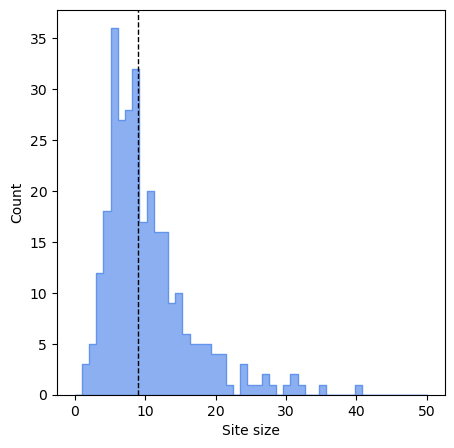

In [6]:
D = all_bss_dfs.number_bs_res
print(len(D))

bns_size = np.linspace(0, 50, 50)
plot_hist(
    D, "Site size", bns_size, "cornflowerblue", dpi = 100,
    figsize = (5, 5)#, out = os.path.join(main_dir, "BSS_size_300.png")
)

## LIGAND BINDING SITE AVERAGE DIVERGENCE

293
	MIN = 0.0	MEAN = 40.93	MEDIAN = 39.8	MAX = 80.9


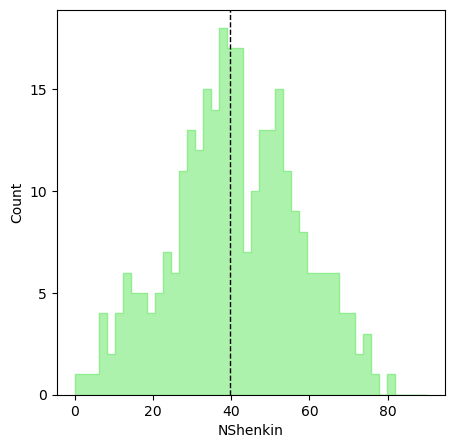

In [7]:
D = all_bss_dfs.norm_shenkin_rel
print(len(D))

bns_shenk = np.linspace(0, 90, 45)
plot_hist(
    D, "NShenkin", bns_shenk, "lightgreen", dpi = 100,
    yticks = list(np.linspace(0,15,4)), figsize = (5, 5)#, out = os.path.join(main_dir, "BSS_shenk_300.png")
)

## LIGAND BINDING SITE AVERAGE MISSENSE ENRICHMENT

293
	MIN = -0.71	MEAN = 0.03	MEDIAN = 0.01	MAX = 1.04


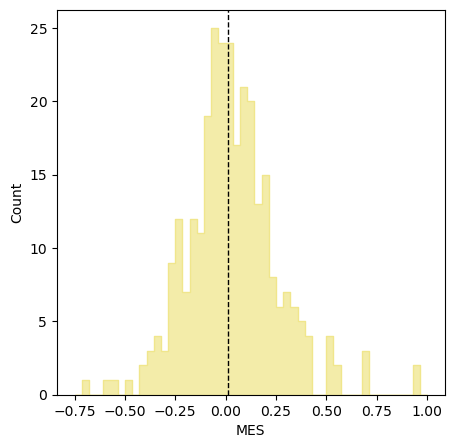

In [8]:
D = all_bss_dfs.MES
print(len(D))

bns_mes = np.linspace(-0.75, 1.00, 50)
plot_hist(D, "MES", bns_mes, "khaki", dpi = 100,
         figsize = (5, 5)#, out = os.path.join(main_dir, "BSS_MES_300.png")
)

## LIGAND BINDING SITE AVERAGE RELATIVE SOLVENT ACCESSIBILITY

In [24]:
def get_rsa_profiles_LOC(bss_df, ress_df):
    """
    Returns a dictionary containint the binding site IDs as keys,
    and the site RSA profile as value. This is a list containing
    the RSA values of the residues forming the site.
    """
    prots = bss_df.protein.unique().tolist()
    rsa_profs = {}
    #rsa_profs_lens = []
    for prot in prots:
        prot_groups = sorted(bss_df.query('protein == @prot').group.unique().tolist())
        for group in prot_groups:
            prot_group_ress = ress_df.query('protein == @prot & group == @group')
            if len(prot_group_ress) == 0:
                print("Group {} of {} has 0 residues. Skipping!".format(group, prot))
                continue
            prot_bs_ids = sorted(bss_df.query('protein == @prot & group == @group').bs_id.unique().tolist())
            for prot_bs_id in prot_bs_ids:
                prot_bs_ress = prot_group_ress[prot_group_ress[prot_bs_id] == 1]
                prot_bs_ress = prot_bs_ress.drop_duplicates(["protein", "UniProt_ResNum", "UniProt_ResName"])
                #rsa_profs_lens.append(len(prot_bs_ress))
                if len(prot_bs_ress) == 0:
                    print("0 res at {} of group {} of {}".format(prot_bs_id, group, prot))
                    continue
                bs_rsas = prot_bs_ress.RSA.tolist()
                dk = "{}_{}_{}".format(prot, group, prot_bs_id)
                rsa_profs[dk] = sorted([round(el, 1) for el in bs_rsas])
    return rsa_profs#, rsa_profs_lens

In [10]:
all_bs_ress.shape

(14172, 62)

In [11]:
all_bs_ress_filt = all_bs_ress.drop_duplicates(["protein", "UniProt_ResNum", "UniProt_ResName"])

In [12]:
all_bs_ress_filt.shape

(2664, 62)

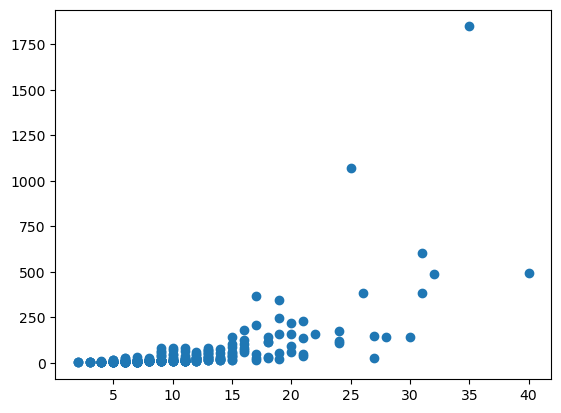

In [23]:
plt.scatter(rsa_profs_lens_un, rsa_profs_lens)

In [19]:
rsa_profs_un, rsa_profs_lens_un = get_rsa_profiles_LOC(all_bss_dfs, all_bs_ress)

In [21]:
average_rsas_un = [statistics.median(v) for v in rsa_profs_un.values()]

In [17]:
rsa_profs, rsa_profs_lens = get_rsa_profiles_LOC(all_bss_dfs, all_bs_ress)
average_rsas = [statistics.median(v) for v in rsa_profs.values()]

293
	MIN = 4.3	MEAN = 32.07	MEDIAN = 31.1	MAX = 81.7


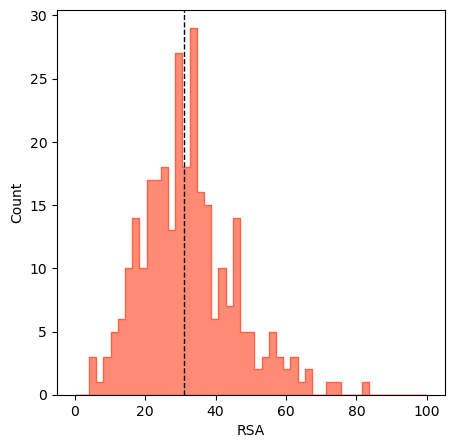

In [22]:
D_un = average_rsas_un
print(len(D))

bns_RSA = np.linspace(0, 100, 50)
plot_hist(D_un, "RSA", bns_RSA, "tomato", dpi = 100,
         figsize = (5, 5)#, out = os.path.join(main_dir, "BSS_RSA_300.png")
)

293
	MIN = 4.4	MEAN = 32.07	MEDIAN = 31.7	MAX = 81.0


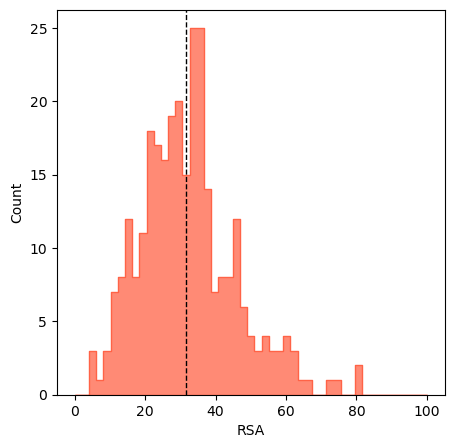

In [15]:
D = average_rsas
print(len(D))

bns_RSA = np.linspace(0, 100, 50)
plot_hist(D, "RSA", bns_RSA, "tomato", dpi = 100,
         figsize = (5, 5)#, out = os.path.join(main_dir, "BSS_RSA_300.png")
)

293
	MIN = 4.4	MEAN = 32.07	MEDIAN = 31.7	MAX = 81.0


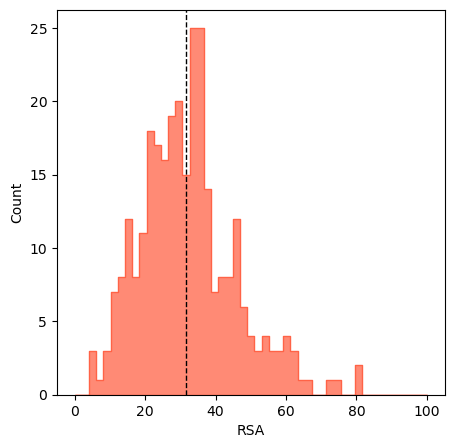

In [21]:
D = average_rsas
print(len(D))

bns_RSA = np.linspace(0, 100, 50)
plot_hist(D, "RSA", bns_RSA, "tomato", dpi = 100,
         figsize = (5, 5)#, out = os.path.join(main_dir, "BSS_RSA_300.png")
)